In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# first step would be to import the dataset
X_full = pd.read_csv('./red_wine_dataset.csv')
percentage = 0.8
X_train = X_full.sample(frac=percentage, random_state=0)
y_train = X_train.pop('quality')
X_test = X_full.drop(X_train.index)
y_test = X_test.pop('quality')
print(len(X_train.index))
print(len(X_test.index))
X_full


1279
320


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,k_value,l_value,m_value,percentage_free_sulphur,n_value
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,8.100,4.0500,0.636,30.909091,0.6080
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,8.680,4.3400,0.778,26.800000,0.8290
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,8.560,4.2800,0.742,36.000000,0.7440
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,11.480,5.7400,0.655,35.294118,0.7195
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,8.100,4.0500,0.636,30.909091,0.6080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,6.800,3.4000,0.670,13.750000,0.6610
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,6.450,3.2250,0.822,13.076923,0.7110
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,6.810,3.4050,0.826,13.793103,0.7540
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,6.545,3.2725,0.785,13.750000,0.6615


In [77]:
x_train = X_train.to_numpy()
x_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)
print(y_train.shape)

(1279, 16)
(320, 16)
float64
(1279,)


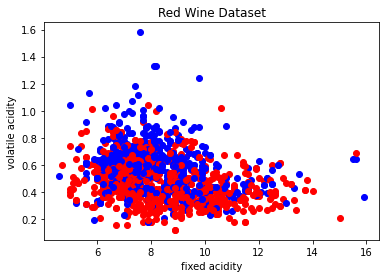

In [78]:
#classic way to plot the data
for i in range(x_train.shape[0]):
    if(y_train[i] == 1):
        plt.scatter(x_train[i,0], x_train[i,1], color='red')
    else:
        plt.scatter(x_train[i,0], x_train[i,1], color='blue')
plt.xlabel('fixed acidity')
plt.ylabel('volatile acidity')
plt.title('Red Wine Dataset')
plt.show()

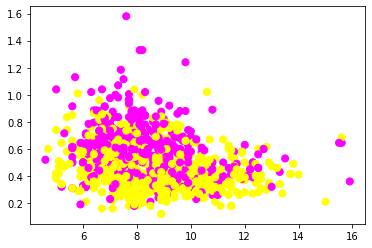

In [79]:
#quicker way to plot the data
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50, cmap='spring')
plt.show()

3.999927832269524e-16


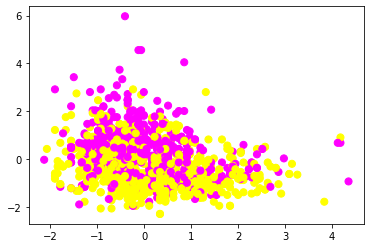

In [80]:
#Normalizing the data (mean=0, std=1)
x_train = x_train - x_train.mean(axis = 0)
x_train = x_train / x_train.std(axis = 0)
#quicker way to plot the data
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50, cmap='spring')
print(x_train[:,3].mean())
plt.show()


In [92]:
def logistic_loss(scores, y):
    # print(scores.shape)
    # print(y.shape)
    y_new = y.reshape(scores.shape)
    loss_vector = (-1 *( y_new * np.log(scores) + (1 - y_new) * np.log(1 - scores) ) )
    print(loss_vector.shape)
    loss = np.sum(loss_vector, axis = 0)
    cache = scores, loss_vector, y_new
    return loss, cache

In [93]:
def logistic_loss_backward(cache):
    scores, loss_vector, y = cache
    return ((1 - y) / (1 - scores) - y / scores)

In [94]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [95]:
def sigmoid_forward(x, w, b):
    z = sigmoid(np.dot(x, w) + b)
    cache = (x, w, b, z)
    return z, cache

In [96]:
def sigmoid_backward(dscores, cache):
    x, w, b, z = cache
    dz = dscores * sigmoid(z) * (1 - sigmoid(z))
    dw = np.dot(x.T, dz)
    db = np.sum(dz, axis=0) 
    return dw, db

In [102]:
np.random.seed(0)
w = np.random.randn(x_train.shape[1], 1)
b = np.zeros((1, 1))
op, cache_sigmoid = sigmoid_forward(x_train[15:20], w, b )
# print(op)
loss,cache_logistic = logistic_loss(op, y_train[15:20].reshape(-1,1))
print("old loss = ", loss)
grads = logistic_loss_backward(cache_logistic)
# print(grads.shape,'\n', grads)
dw, db = sigmoid_backward(grads, cache_sigmoid)
print(dw)
# print(db.shape)
b = b - 0.1 * db
w = w - 0.1 * dw
op_new,cache_sigmoid = sigmoid_forward(x_train[15:20], w, b)
loss, cache_logistic = logistic_loss(op_new, y_train[15:20].reshape(-1,1))
print("new loss = ",loss)




(5, 1)
(5, 1)
(5, 1)
old loss =  [9.53929371]
[[  6.91651084]
 [ 14.03663154]
 [ -6.53327595]
 [  1.94445301]
 [  6.50021293]
 [-22.35312204]
 [ -6.3805691 ]
 [ 15.05902305]
 [ -5.10434206]
 [-18.62253463]
 [-13.73166794]
 [  8.52012355]
 [  8.52012355]
 [-14.74998009]
 [  8.51689184]
 [  1.62442459]]
(5, 1)
(5, 1)
(5, 1)
new loss =  [0.06382274]


In [ ]:
# def logistic_backward(dscore, cache):
#     x, w, b = cache
#     dw = np.dot(x.T, (dscore * sigmoid(np.dot(x, w) + b) * (1 - sigmoid(np.dot(x, w) + b))))
#     db = np.sum(dscore * sigmoid(np.dot(x, w) + b) * (1 - sigmoid(np.dot(x, w) + b)), axis=0)
#     dx = np.dot(dscore * sigmoid(np.dot(x, w) + b) * (1 - sigmoid(np.dot(x, w) + b)), w.T)
#     return dx, dw, db

In [15]:
# #Build the Model 
# class Logisitic_Classifier():
#     def __init__(self, input_dim, reg = 0.01):
#         self.reg = reg
#         self.input_dim = input_dim
#         self.params = {}
#         # Now we do intialization of the weights
#         np.random.seed(0)
#         self.params['W'] = np.random.randn(input_dim, 1)
#         self.params['b'] = 0
#         pass
#     def loss(self,X,y = None): # this function will perform both the backward and forward passes and return the gradients 
#         # define a mode here, i.e. a trinign mode or a test mode
#         mode = 'test' if y is None else 'train'
#         if(mode == 'train'):
#             Z = np.dot(X, self.params['W']) + self.params['b']
#             Z = Z[0]
#             # print(Z)
#             y_pred = sigmoid(Z)
#             print(y_pred)
#             loss = logistic_loss(y_pred, y)
#             return loss


In [16]:
# simplelogistic = Logisitic_Classifier(input_dim=x_train.shape[1], reg = 0.5)

In [17]:
# print("loss = " ,simplelogistic.loss(x_train[1,:], y_train[1]))


0.8715620612681035
loss =  2.0523094583799755
